In [1]:
import pandas as pd
import os
from fastai.vision.all import *

C:\Users\bowan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

df = pd.read_csv('../image_data_assorted.csv')

In [3]:
df.head()

,Radius,X_Position,Y_Position,Area,Surface2d,Volume,image_path,mask_path,shape
0,26,216,360,2123,82,73585,../images_assorted/image_1.png,../masks_assorted/mask_1.png,circle
1,56,285,248,3136,224,175616,../images_assorted/image_2.png,../masks_assorted/mask_2.png,square
2,16,69,205,256,64,4096,../images_assorted/image_3.png,../masks_assorted/mask_3.png,square
3,105,336,270,34618,330,4846590,../images_assorted/image_4.png,../masks_assorted/mask_4.png,circle
4,99,182,295,4900,338,970299,../images_assorted/image_5.png,../masks_assorted/mask_5.png,triange


In [9]:
from torchvision import transforms
# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create(image_paths[4])

transform = transforms.ToTensor()
image_tensor = transform(image_data)

print(image_tensor.shape)  # Should output (3, 512, 512)

# Stack two copies of the image tensor along the width
stacked_tensor = torch.cat((image_tensor, image_tensor), dim=1)
print(stacked_tensor.shape)  # Should output (3, 512, 1024)


torch.Size([3, 512, 512])
torch.Size([3, 1024, 512])


In [20]:
def get_inputs(row):
    # Convert image path to PILImage
    image_data = PILImage.create(row['image_path'])
    
    transform = transforms.ToTensor()
    image_tensor = transform(image_data)
    # Stack two copies of the image tensor along the width
    stacked_tensor = torch.cat((image_tensor, image_tensor), dim=0)
    print(stacked_tensor.shape)
    return stacked_tensor 

def get_target(row):
    # Convert image path to PILImage
    target_data = row['mask_path']
    return target_data

In [21]:
codes = ['blank','background', 'object'] # remember 0 is first entry so pixels 1, 2 ,3 etc need a dummy entry for 0

dblock = DataBlock(
    blocks=(TransformBlock, MaskBlock(codes=codes)),  # Image input and auxiliary input
    get_x=get_inputs,  # Get both the image path and the auxiliary input
    get_y=get_target,  # Get the radius value from the dataframe
    #splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split into train and validation sets
    #item_tfms=Resize(512)  # Resize images to 512x512

)

In [22]:

dls = dblock.dataloaders(df, bs=4)


torch.Size([6, 512, 512])
torch.Size([6, 512, 512])


In [ ]:
# set up model 

In [33]:
# Assuming your SimpleFeedForwardNN model is defined as shown before
class Simplemodel(nn.Module):
    def __init__(self ):
        super(Simplemodel, self).__init__()
        

        #self.conv1  = nn.Conv1d(1, 1, kernel_size=1, stride=1, padding=1, bias=False)
        #self.bn    = nn.BatchNorm1d(1)
        

        #self.fc3 = nn.Linear(16, 16)
        #self.fc4 = nn.Linear(16, 16)
        #self.fc5 = nn.Linear(16, 1)
        self.final_weight_multi = nn.Parameter(torch.tensor(5.0))  
        self.final_weight_add = nn.Parameter(torch.tensor(5.0))          

    def forward(self, inputdata):

        print(inputdata.shape)
        



        
        #x = self.fc1(x)      
        
        x=1         
        
        return x

In [34]:
from fastai.vision.all import *
learn = Learner(dls, Simplemodel, metrics=Dice)

In [35]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

TypeError: Module.parameters() missing 1 required positional argument: 'self'

torch.Size([3, 1024, 512])
torch.Size([3, 1024, 512])
torch.Size([3, 1024, 512])
torch.Size([3, 1024, 512])


AttributeError: 'Tensor' object has no attribute 'show'

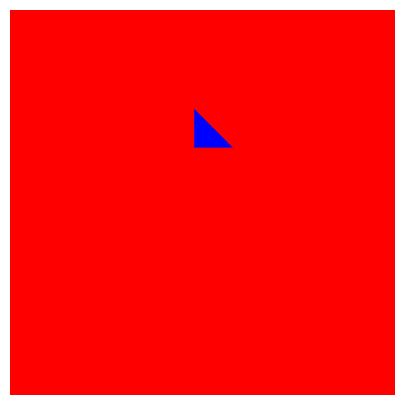

In [19]:

image_paths = df['image_path']
image_data = PILImage.create(image_paths[4])
image_data.show()

#print('filtered batched data below')

dls.show_batch()

In [8]:
# Create and train the learner
learn = unet_learner(dls, resnet34, metrics=Dice)


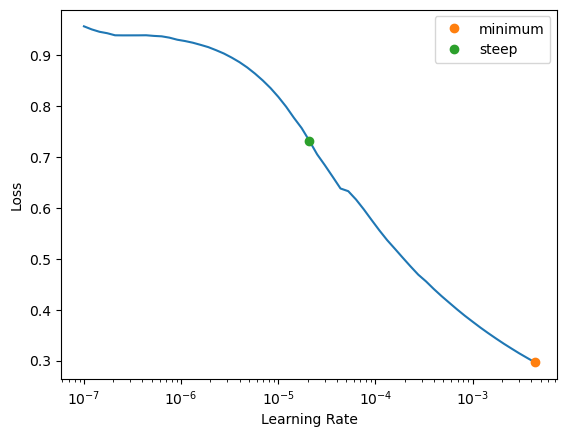

In [9]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [10]:
learn.fine_tune(10, base_lr=lr_steep)

epoch,train_loss,valid_loss,dice,time
0,0.028701,0.002051,1.058857,00:49


epoch,train_loss,valid_loss,dice,time
0,0.000877,0.000666,1.059126,00:50
1,0.000427,0.000814,1.059339,00:49
2,0.000175,0.000161,1.059265,00:49
3,0.000101,0.000084,1.059252,00:48
4,0.000068,0.000057,1.059257,00:48
5,0.000045,0.000045,1.059259,00:48
6,0.000038,0.000037,1.059259,00:51



KeyboardInterrupt



<bound method Recorder.plot_loss of Recorder>


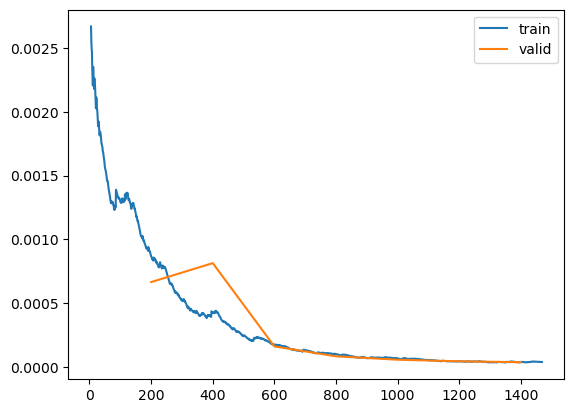

In [11]:
# Plot the losses
learn.recorder.plot_loss()
print(learn.recorder.plot_loss)
# Set the y-axis limits (replace with your desired limits)
#plt.ylim(0, 5)  # sets y-axis limits 
# Show the plot with updated y-limits
plt.show()

In [12]:
os.chdir('segmentation')

learn.export('exported_segmentation_model.pkl')
 


In [15]:
# import

learn2 = load_learner('exported_segmentation_model.pkl')   # using learner2 to show its loading
os.chdir('..')

torch.Size([512, 512])
<class 'tuple'>


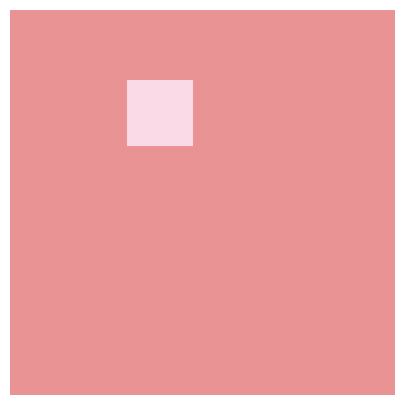

In [30]:
# just getting a random image from df
image_paths = df['image_path']
image_data = PILImage.create(image_paths[4])
prediction = learn2.predict(image_data)


prediction[0].show()
print(prediction[0].shape)
print(type(prediction))

In [ ]:
image_data.show()